# Visualize embeddings

In [68]:
from pathlib import Path
from typing import List
from functools import reduce
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import umap
from sklearn.model_selection._search import ParameterGrid


import NegativeClassOptimization.config as config
import NegativeClassOptimization.preprocessing as preprocessing
import NegativeClassOptimization.utils as utils
from NegativeClassOptimization import visualisations

In [35]:
df = utils.load_global_dataframe()
df.head()

Unnamed: 0.1  Unnamed: 0 ID_slide_Variant                CDR3  Best  \
0             0           0      5319791_04a  CARSAAFITTVGWYFDVW  True   
1             1           1      3796836_02a      CAAAFYGRWYFDVW  True   
2             2           2      5098589_01a     CAAFYYGNLAWFAYW  True   
3             3           3      5151925_01a        CAAGWLLLFAYW  True   
4             4           4       879141_05a    CARYAAAGWLLLFDYW  True   

         Slide  Energy          Structure               UID Antigen  \
0  AAFITTVGWYF  -94.70  128933-BRRSLUDUUS  1ADQ_5319791_04a    1ADQ   
1  AAFYGRWYFDV  -94.57  128933-BRRSLUSURD  1ADQ_3796836_02a    1ADQ   
2  AAFYYGNLAWF  -97.63  141287-DDLUSURLRR  1ADQ_5098589_01a    1ADQ   
3  AAGWLLLFAYW  -95.45  124837-RRURSUUSLD  1ADQ_5151925_01a    1ADQ   
4  AAGWLLLFDYW  -95.45  124837-RRURSUUSLD   1ADQ_879141_05a    1ADQ   

   Slide_farmhash_mod_10  
0                      5  
1                      9  
2                      2  
3                      3  
4                      9

In [40]:
import pickle

emb_dir = Path("../data/slack_1/global/embeddings/ProtTransT5XLU50")
emb = {}
for b in range(1, 3):  # 75
    with open(emb_dir / f"slide_embeddings_per_prot_b{b}.pkl", "rb") as f:
        emb.update(pickle.load(f))
    print(len(emb))

df = df.loc[df["Slide"].isin(emb.keys())].copy()

5000
10000


In [52]:
emb_arr = df["Slide"].map(lambda x: emb[x])
emb_arr = np.stack(emb_arr)
emb_arr.shape

(12531, 1024)

Computing for: {'metric': 'hamming', 'min_dist': 0.0, 'n_neighbors': 10}


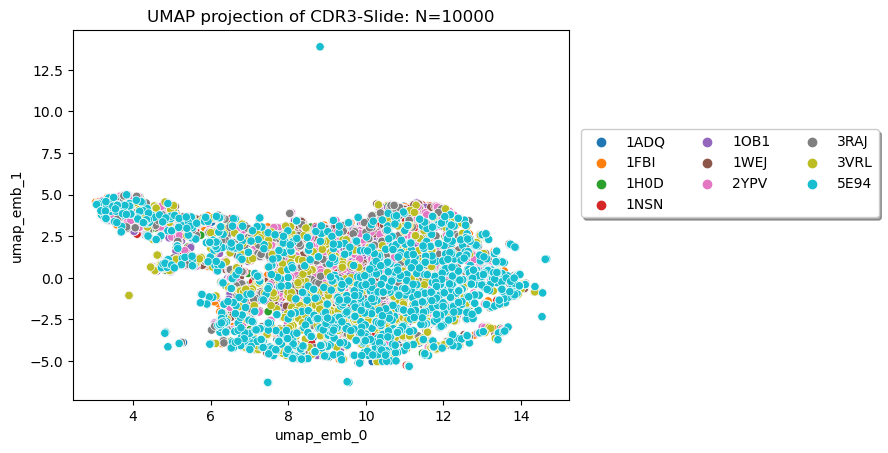

Computing for: {'metric': 'hamming', 'min_dist': 0.0, 'n_neighbors': 50}


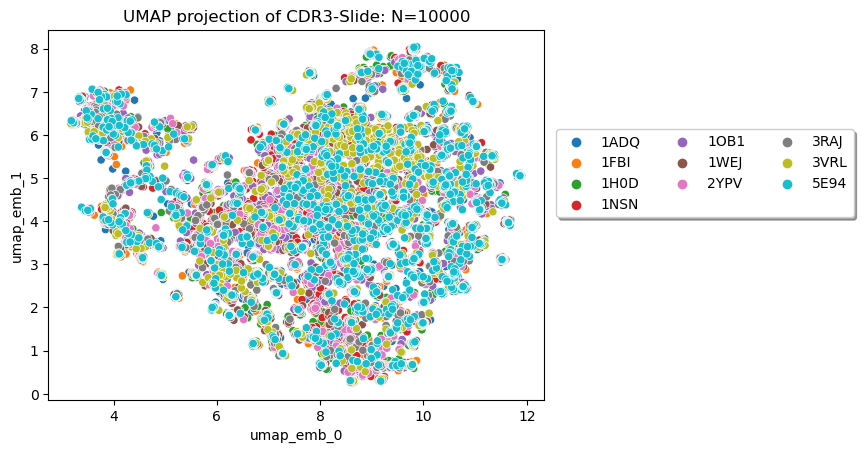

Computing for: {'metric': 'hamming', 'min_dist': 0.0, 'n_neighbors': 300}


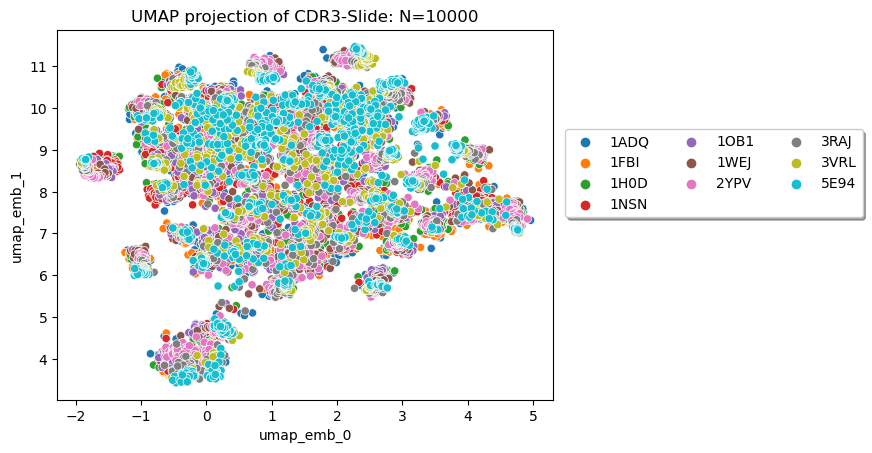

Computing for: {'metric': 'hamming', 'min_dist': 0.0, 'n_neighbors': 600}


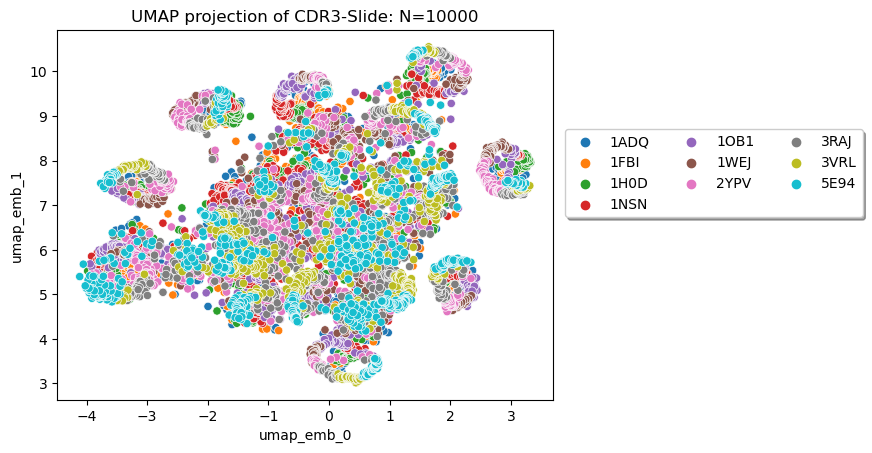

Computing for: {'metric': 'hamming', 'min_dist': 1e-06, 'n_neighbors': 10}


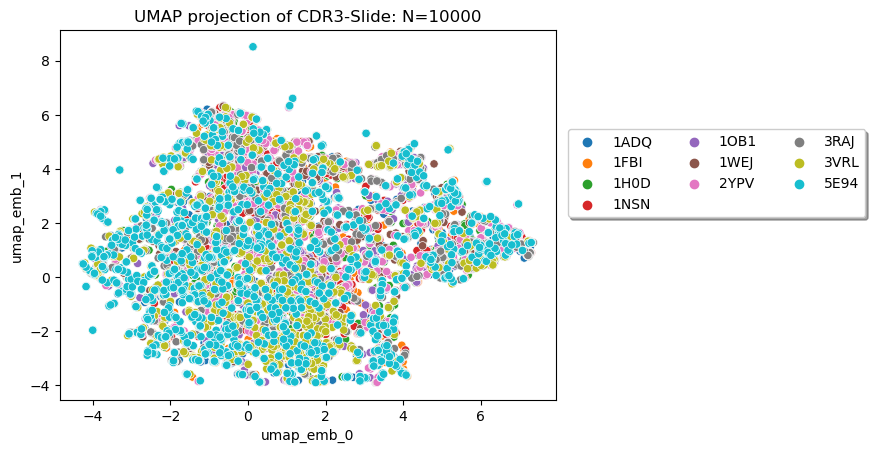

Computing for: {'metric': 'hamming', 'min_dist': 1e-06, 'n_neighbors': 50}


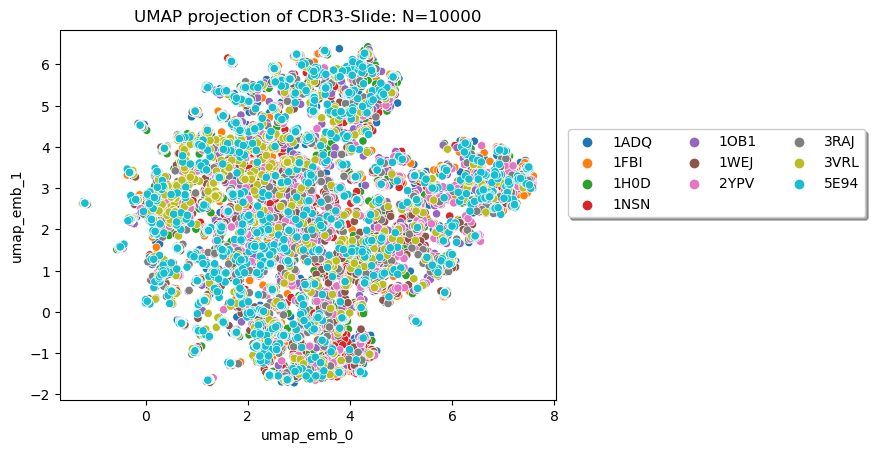

Computing for: {'metric': 'hamming', 'min_dist': 1e-06, 'n_neighbors': 300}


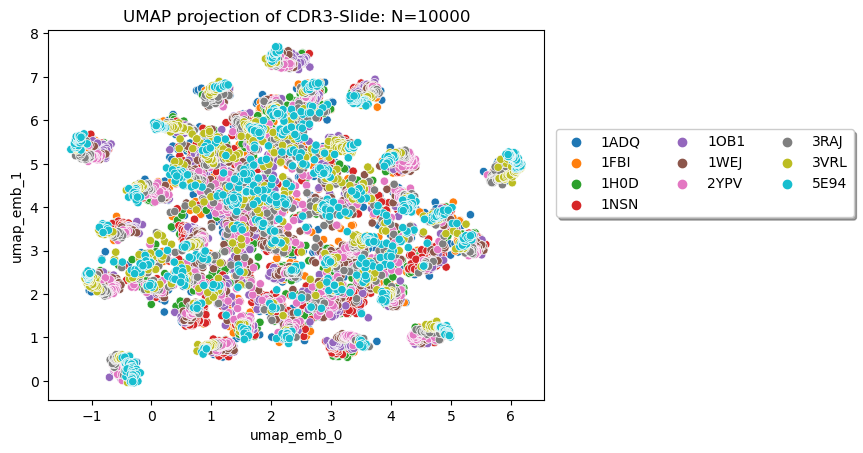

Computing for: {'metric': 'hamming', 'min_dist': 1e-06, 'n_neighbors': 600}


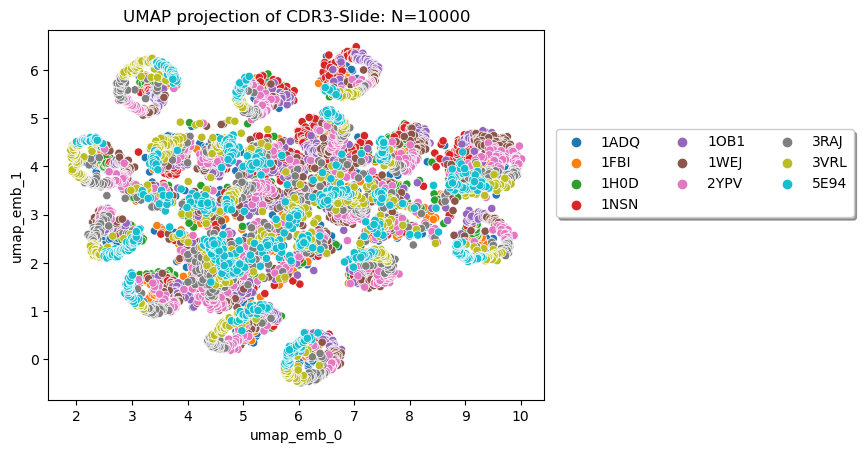

Computing for: {'metric': 'hamming', 'min_dist': 0.001, 'n_neighbors': 10}


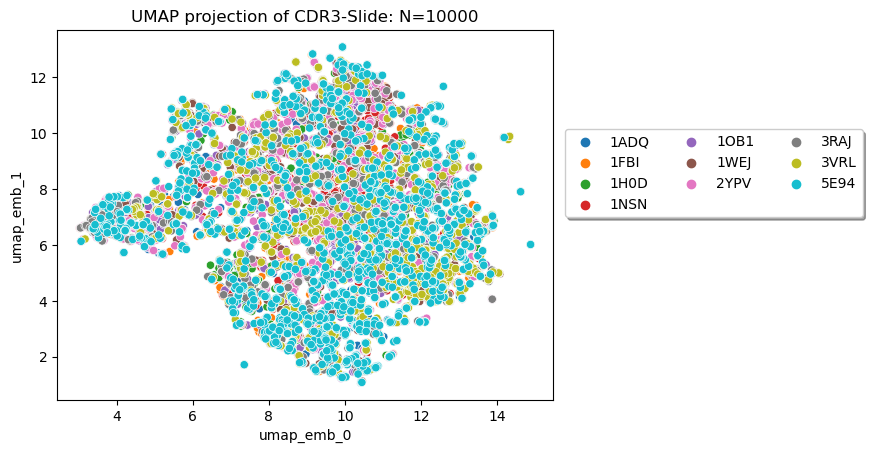

Computing for: {'metric': 'hamming', 'min_dist': 0.001, 'n_neighbors': 50}


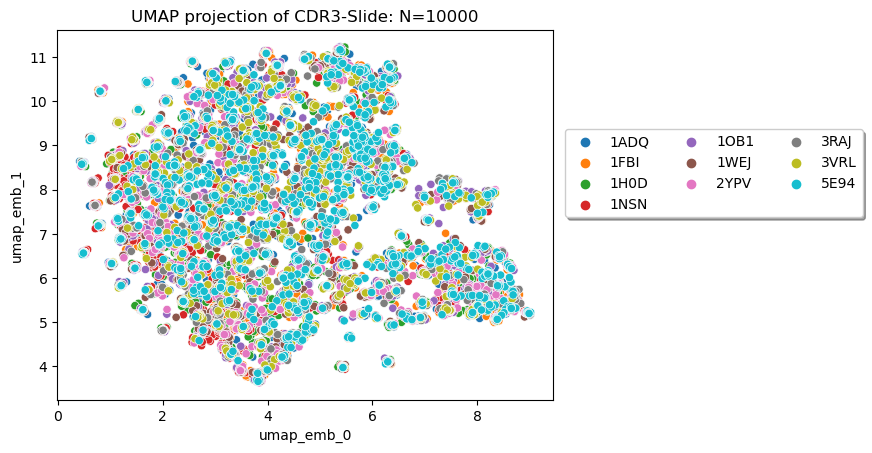

Computing for: {'metric': 'hamming', 'min_dist': 0.001, 'n_neighbors': 300}


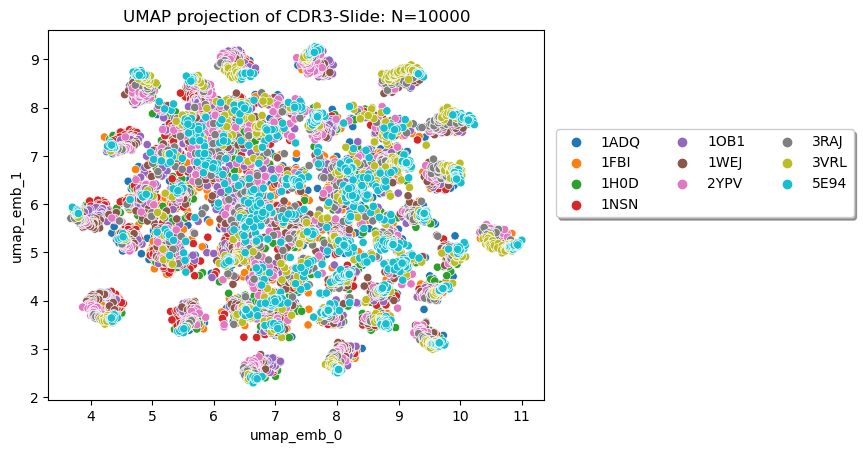

Computing for: {'metric': 'hamming', 'min_dist': 0.001, 'n_neighbors': 600}


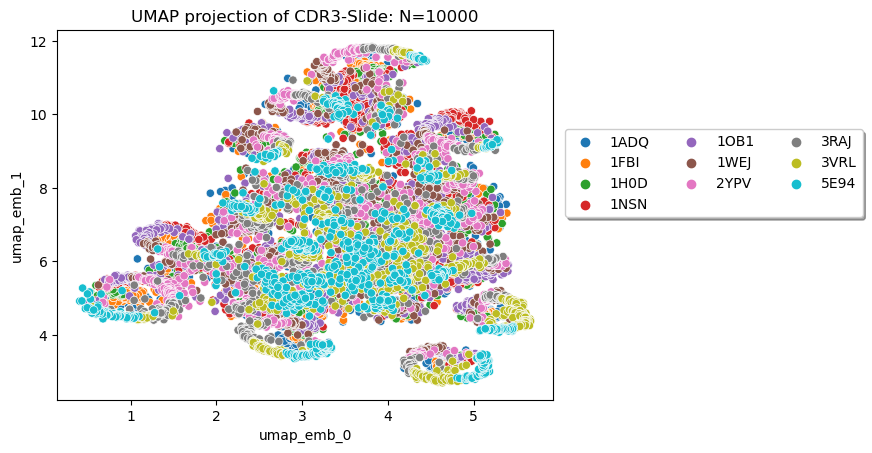

Computing for: {'metric': 'hamming', 'min_dist': 0.1, 'n_neighbors': 10}


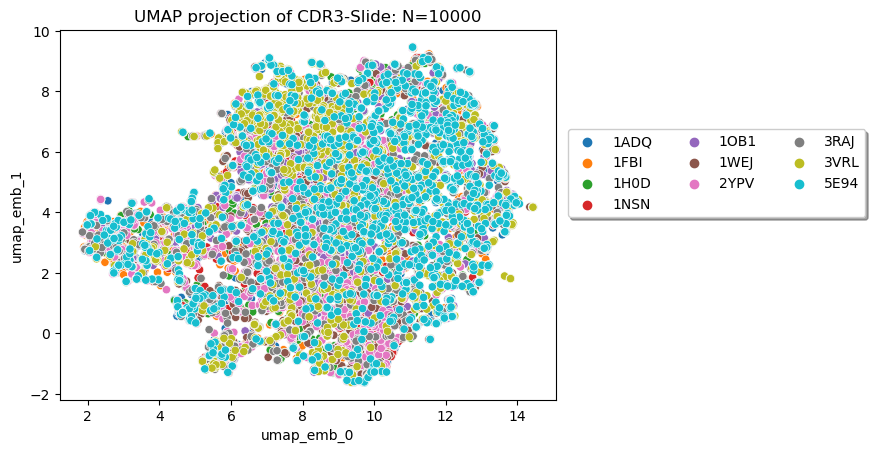

Computing for: {'metric': 'hamming', 'min_dist': 0.1, 'n_neighbors': 50}


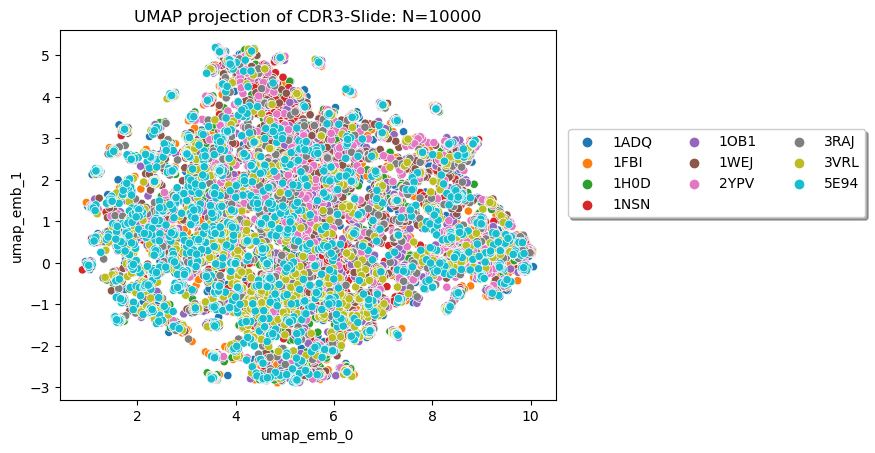

Computing for: {'metric': 'hamming', 'min_dist': 0.1, 'n_neighbors': 300}


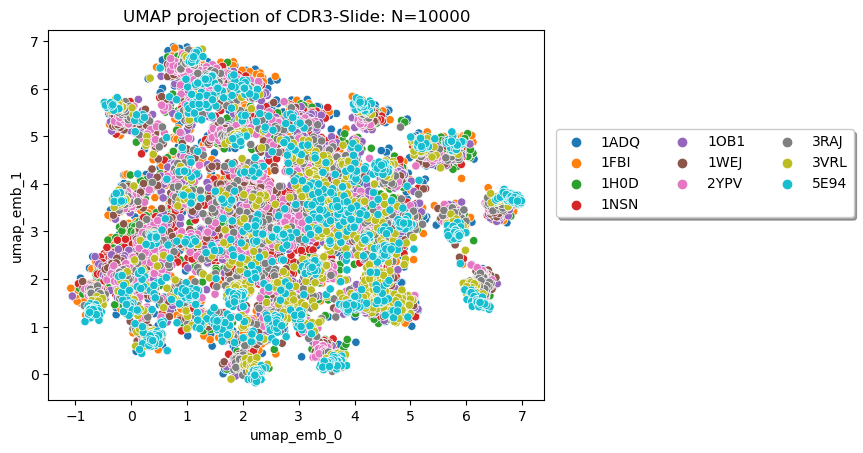

Computing for: {'metric': 'hamming', 'min_dist': 0.1, 'n_neighbors': 600}


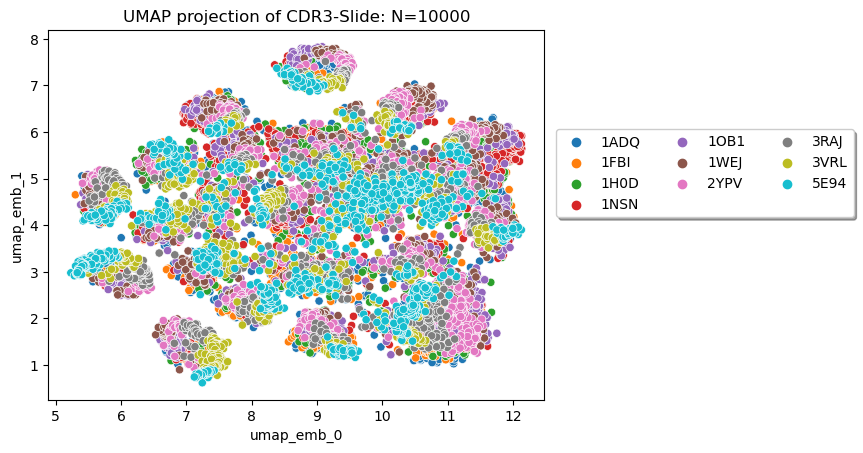

Computing for: {'metric': 'hamming', 'min_dist': 0.5, 'n_neighbors': 10}


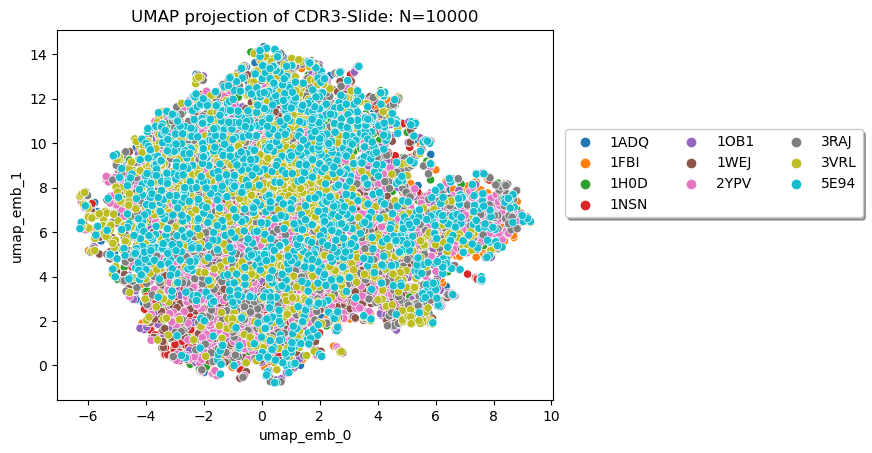

Computing for: {'metric': 'hamming', 'min_dist': 0.5, 'n_neighbors': 50}


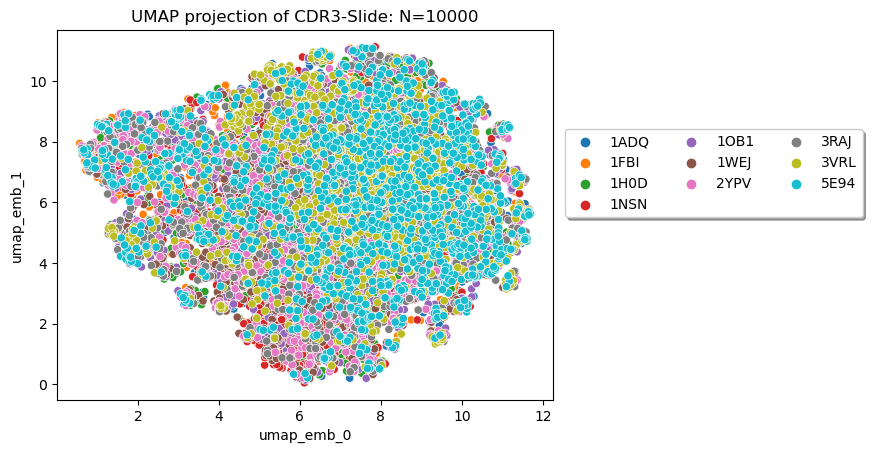

Computing for: {'metric': 'hamming', 'min_dist': 0.5, 'n_neighbors': 300}


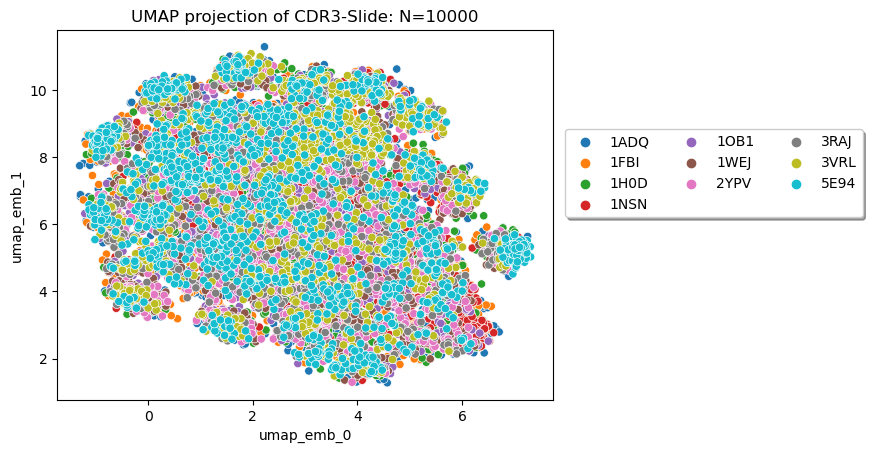

Computing for: {'metric': 'hamming', 'min_dist': 0.5, 'n_neighbors': 600}


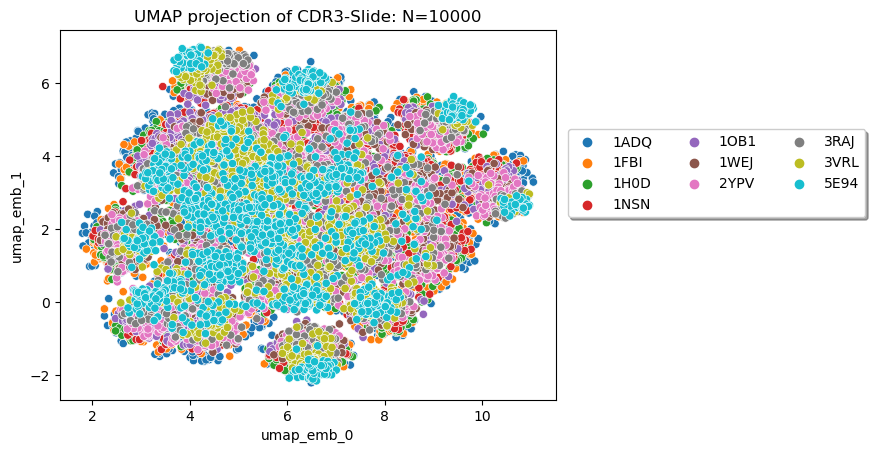

In [69]:
# params = {
#     "n_neighbors": 300, # [10, 50, 300,  600],  # global vs local
#     "min_dist": 1e-6,  # [0.0, 1e-6, 1e-3, 0.1, 0.5],  # clumpiness
#     "metric": "euclidean",
# }

param_grid = ParameterGrid({
    "n_neighbors": [10, 50, 300,  600],
    "min_dist": [0.0, 1e-6, 1e-3, 0.1, 0.5],
    "metric": ["hamming"],
})

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for params in param_grid:
        print(f"Computing for: {params}")
        reducer = umap.UMAP(**params)
        reducer = umap.UMAP(**params)
        embedding = reducer.fit_transform(emb_arr)
        df["umap_emb_0"] = embedding[:, 0]
        df["umap_emb_1"] = embedding[:, 1]
        sns.scatterplot(data=df, x="umap_emb_0", y="umap_emb_1", hue="Antigen")
        plt.legend(bbox_to_anchor=(1.01, 0.75),
            ncol=3, fancybox=True, shadow=True)
        plt.title(f'UMAP projection of CDR3-Slide: N={10000}')
        plt.show()